### Gradient descent for simple Linear Regression with partial derivative for non-convex functions

Epoch: 1:
Current weight: 0.44780000000000003
(MSE) is the average of the squares of the errors between the predicted y (w*x) and actual y.: 43.561099999999996
Gradient for single param variable is ordinary derivative of the MSE with respect to weight w. It tells us the direction to move on the w-axis to minimize the MSE -43.78
The gradient is the partial derivative of the MSE with respect to weight w. It tells us the direction to move on the w-axis to minimize the MSE.


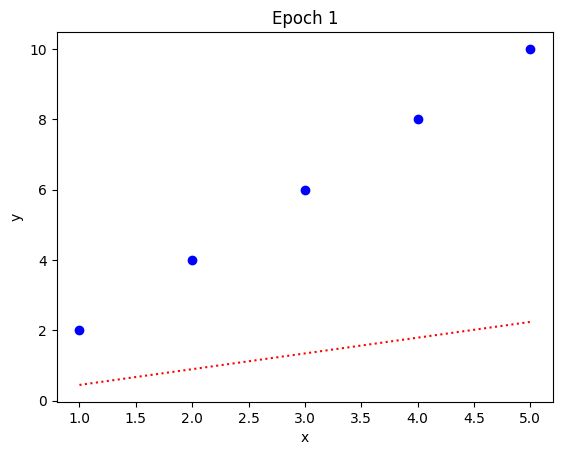

Epoch: 2:
Current weight: 0.7892840000000001
(MSE) is the average of the squares of the errors between the predicted y (w*x) and actual y.: 26.502573239999997
Gradient for single param variable is ordinary derivative of the MSE with respect to weight w. It tells us the direction to move on the w-axis to minimize the MSE -34.1484
The gradient is the partial derivative of the MSE with respect to weight w. It tells us the direction to move on the w-axis to minimize the MSE.


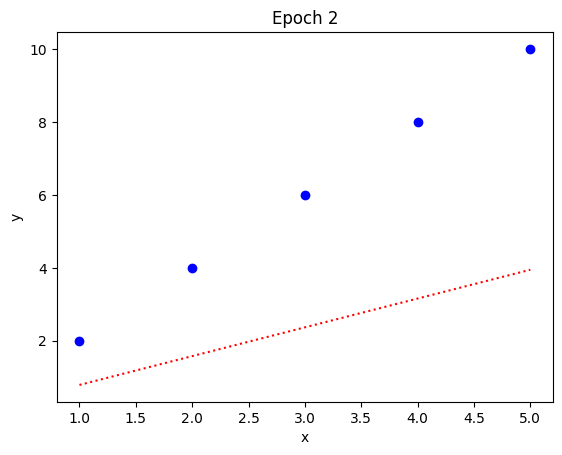

Epoch: 3:
Current weight: 1.05564152
(MSE) is the average of the squares of the errors between the predicted y (w*x) and actual y.: 16.124165559216
Gradient for single param variable is ordinary derivative of the MSE with respect to weight w. It tells us the direction to move on the w-axis to minimize the MSE -26.635751999999997
The gradient is the partial derivative of the MSE with respect to weight w. It tells us the direction to move on the w-axis to minimize the MSE.


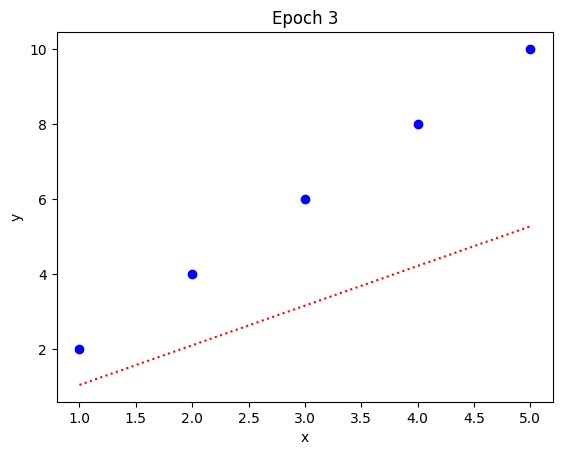

Epoch: 4:
Current weight: 1.2634003856
(MSE) is the average of the squares of the errors between the predicted y (w*x) and actual y.: 9.809942326227015
Gradient for single param variable is ordinary derivative of the MSE with respect to weight w. It tells us the direction to move on the w-axis to minimize the MSE -20.77588656
The gradient is the partial derivative of the MSE with respect to weight w. It tells us the direction to move on the w-axis to minimize the MSE.


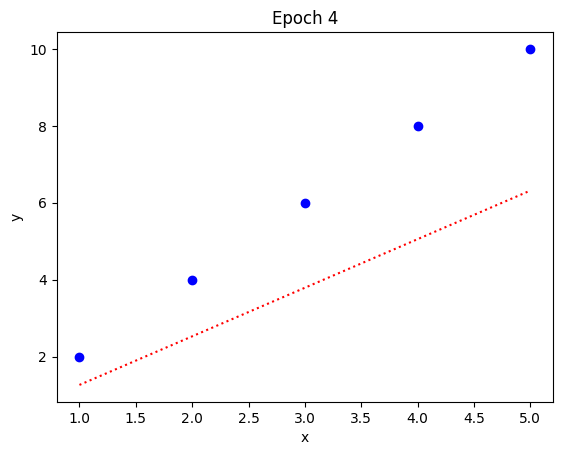

Epoch: 5:
Current weight: 1.425452300768
(MSE) is the average of the squares of the errors between the predicted y (w*x) and actual y.: 5.9683689112765155
Gradient for single param variable is ordinary derivative of the MSE with respect to weight w. It tells us the direction to move on the w-axis to minimize the MSE -16.2051915168
The gradient is the partial derivative of the MSE with respect to weight w. It tells us the direction to move on the w-axis to minimize the MSE.


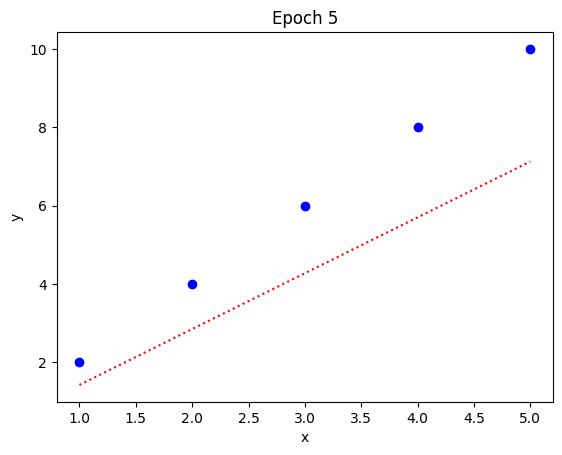

In [3]:
# Adjust the 3D plot for better visibility of the local minimum

# Set up the figure and axis for 3D plotting
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(10, 8))

# Plot the surface
ax.plot_surface(x1, x2, z, cmap='viridis', edgecolor='none', alpha=0.7)

# Enhance visibility of minima
ax.scatter(2, 2, f_3d(2, 2), color='r', s=50)  # Global minimum
ax.scatter(0, 0, f_3d(0, 0), color='b', s=50)  # Local minimum

# Annotate the minima
ax.text(2, 2, f_3d(2, 2) + 2, 'Global Minima', color='red')
ax.text(0, 0, f_3d(0, 0) + 2, 'Local Minima', color='blue')

# Adjust the viewpoint for better visibility
ax.view_init(elev=30, azim=135)

# Labeling
ax.set_title('3D Plot with Local and Global Minima')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('f(x1, x2)')

# Show the plot
plt.show()


### Ordinary Derevative explained
